### Desafío - Análisis lineal discriminante

#### Ejercicio 1: Preparación de ambiente de trabajo

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import sys
sys.path.append('../../utils/')
from calidad_datos import calidad_datos as cal
import lec4_graphs as gfx

# Quitamos la columna index
df = pd.read_csv('../../data/Taller2/default_credit.csv').drop(columns='index')

# Se cambia el nombre de columna default
df=df.rename(columns={'default':'moroso'})
target_label = df['moroso'].unique()

df

,moroso,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [2]:
df['student'] = LabelEncoder().fit_transform(df['student'])
df['moroso'] = LabelEncoder().fit_transform(df['moroso'])
df


,moroso,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
...,...,...,...,...
9995,0,0,711.555020,52992.378914
9996,0,0,757.962918,19660.721768
9997,0,0,845.411989,58636.156984
9998,0,0,1569.009053,36669.112365


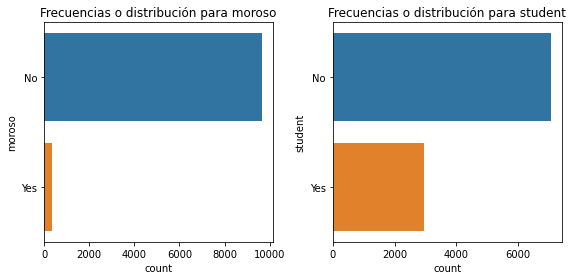

In [21]:
plt.figure(figsize=(8, 4))
for n, i in enumerate(['moroso', 'student']):
    plt.subplot(1, 2, n + 1)
    sns.countplot(y= df[i], order = df[i].value_counts().index)
    plt.title('Frecuencias o distribución para {}'.format(i))
    plt.tight_layout()

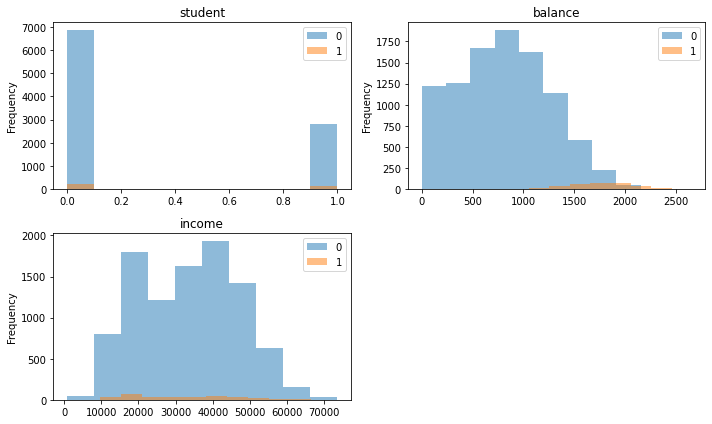

In [4]:
#Distruciones con moroso
plt.figure(figsize=(10, 6))
for n, i in enumerate(df.drop(columns = {'moroso'}).columns):
    plt.subplot(2, 2, n + 1)
    df.groupby('moroso')[i].plot(kind='hist', alpha=.5)
    plt.legend(df['moroso'].unique())
    plt.title(i)
    plt.tight_layout()

#### Ejercicio 2: Modelo base

In [5]:
X_train_mat, X_test_mat, y_train_vec, y_test_vec = train_test_split(df.loc[:, 'student':'income'], df['moroso'], test_size=.33, random_state=11238)

In [6]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_mat, y_train_vec)

LinearDiscriminantAnalysis()

In [7]:
lda_model = LinearDiscriminantAnalysis(n_components=None, priors=None,
            shrinkage=None,solver='svd', store_covariance=False, tol=0.0001)

lda_model.fit(X_train_mat, y_train_vec)

LinearDiscriminantAnalysis()

In [8]:
y_train_vec.value_counts('%')

0    0.967313
1    0.032687
Name: moroso, dtype: float64

In [9]:
print("Probabilidades a priori\n", lda_model.priors_.round(2), "\n")
print("Medias de atributos en cada clase\n",
lda_model.means_.round(2), "\n")
print("Varianza explicada por cada discriminante\n",
lda_model.explained_variance_ratio_.round(2), "\n")

Probabilidades a priori
 [0.97 0.03] 

Medias de atributos en cada clase
 [[2.900000e-01 8.036500e+02 3.340200e+04]
 [3.600000e-01 1.734750e+03 3.217489e+04]] 

Varianza explicada por cada discriminante
 [1.] 



In [10]:
#Coeficiente del discriminante
lda_model.coef_

array([[-6.46927932e-01,  4.65931873e-03, -7.50785395e-07]])

In [11]:
lda_class_pred = lda_model.predict(X_test_mat)
lda_class_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

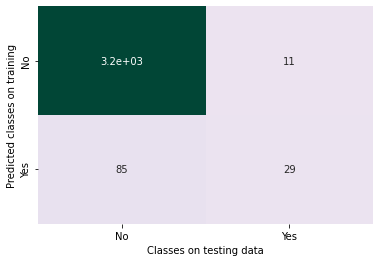

In [12]:
gfx.plot_confusion_matrix(y_test_vec, lda_class_pred, classes_labels=target_label)

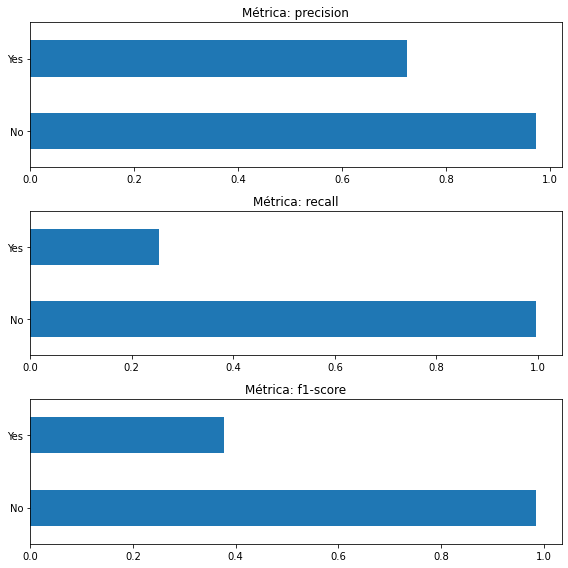

In [13]:
plt.figure(figsize=(8, 8))
gfx.plot_class_report(y_test_vec, lda_class_pred, classes_labels=target_label)

In [15]:
#Otra forma de calcular el modelo
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_mat, y_train_vec)

LinearDiscriminantAnalysis()

In [19]:
# metricas resultantes
yhat = lda_model.predict(X_train_mat,)
print(classification_report(y_train_vec, yhat))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      6481
           1       0.81      0.23      0.36       219

    accuracy                           0.97      6700
   macro avg       0.89      0.61      0.67      6700
weighted avg       0.97      0.97      0.97      6700



#### Resultados 
- Ambas pruebas tienen un gran accuracy
- Basicamente es porque el modelo determina con gran precision a los no morosos (99%)
- Sin embargo no predice correctamente a los clientes morosos (36%)

#### Ejercicio 3: Refactorización 1 - información a priori
Modelo 50/50

In [24]:
lda_model2 = LinearDiscriminantAnalysis(priors=[50, 50]) #aca se fuerza el valor 50/50
lda_model2.fit(X_train_mat, y_train_vec)

LinearDiscriminantAnalysis(priors=[50, 50])

In [25]:
yhat2 = lda_model2.predict(X_train_mat)
print(classification_report(y_train_vec, yhat2))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      6481
           1       0.16      0.91      0.27       219

    accuracy                           0.84      6700
   macro avg       0.58      0.87      0.59      6700
weighted avg       0.97      0.84      0.89      6700



#### Resultados 50/50 
- Bajan las metricas del modelo (f1)de 99% a 91% y de 36% a 27%

Modelo 60/40

In [28]:
lda_model3 = LinearDiscriminantAnalysis(priors=[40, 60]) #aca se fuerza el valor 40/60
lda_model3.fit(X_train_mat, y_train_vec)

LinearDiscriminantAnalysis(priors=[40, 60])

In [29]:
yhat3 = lda_model3.predict(X_train_mat)
print(classification_report(y_train_vec, yhat3))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      6481
           1       0.13      0.94      0.23       219

    accuracy                           0.79      6700
   macro avg       0.56      0.86      0.55      6700
weighted avg       0.97      0.79      0.86      6700



#### Resultados 40/60 
- Bajan aun mas las metricas del modelo (f1)de 99% a 88% y de 36% a 23%

#### Ejercicio 4: Refactorización 2 - oversampling


In [31]:
from imblearn.over_sampling import SMOTE


#### Ejercicio 5: Refactorización 3 - QDA